# Stock Profits vs Unemployment
## Monthly profits [same month with unemployeement announce] (y-axis) vs unemployeement rate (x-axis)

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import calendar
from scipy.stats import linregress
from pprint import pprint

# Import the API key
from api_keys import alpha_vantage_api_key, bls_api_key, fred_api_key

In [19]:
# Monthly Stock Profits dataFrame - 1
# Constants
stock_symbol = 'QQQ'
start_date = '2010-01-01'
end_date = '2019-12-31'
URL = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={stock_symbol}&apikey={alpha_vantage_api_key}&outputsize=full'


# Fetch stock data from alphavantage
response = requests.get(URL).json()

# Define an empty list to fetch the stock data
stock_data = []

for date, values in response['Time Series (Daily)'].items():
    stock_data.append({
        "Date": date,
        "Open": values['1. open'],
        "High": values['2. high'],
        "Low": values['3. low'],
        "Close": values['4. close'],
        "Volume": values['5. volume']
    })

# Conver List to dataFrame
stock_info_df = pd.DataFrame(stock_data)
stock_info_df = stock_info_df[(stock_info_df['Date'] >= start_date) & (stock_info_df['Date'] <= end_date)]

stock_info_df.reset_index()
stock_info_df['Date'] = pd.to_datetime(stock_info_df['Date'])
stock_info_df['Open'] = stock_info_df['Open'].astype(float)
stock_info_df['Close'] = stock_info_df['Close'].astype(float)

stock_info_df

,Date,Open,High,Low,Close,Volume
1086,2019-12-31,211.62,212.7600,211.2000,212.61,18201585
1087,2019-12-30,213.50,213.6300,211.1600,212.21,21829913
1088,2019-12-27,214.54,214.5600,213.0400,213.61,18142239
1089,2019-12-26,212.26,213.8100,212.2300,213.79,17159310
1090,2019-12-24,212.00,212.0900,211.4400,211.92,7089020
...,...,...,...,...,...,...
3597,2010-01-08,46.04,46.5500,45.9300,46.55,88886600
3598,2010-01-07,46.20,46.2700,45.9200,46.17,77094100
3599,2010-01-06,46.39,46.5500,46.0700,46.14,96033000
3600,2010-01-05,46.38,46.5000,46.1600,46.42,62935600


In [20]:
# Monthly Stock Profits dataFrame - 2
# Date, Month Column creation by using Date
stock_info_df['Year'] = stock_info_df['Date'].dt.year
stock_info_df['Month_Number'] = stock_info_df['Date'].dt.month

# Open price for each Year, Month & Close price for each Year, Month
monthly_data = stock_info_df.groupby(['Year', 'Month_Number'])
first_open = monthly_data['Open'].first().reset_index()
last_close = monthly_data['Close'].last().reset_index()

stock_info_df

,Date,Open,High,Low,Close,Volume,Year,Month_Number
1086,2019-12-31,211.62,212.7600,211.2000,212.61,18201585,2019,12
1087,2019-12-30,213.50,213.6300,211.1600,212.21,21829913,2019,12
1088,2019-12-27,214.54,214.5600,213.0400,213.61,18142239,2019,12
1089,2019-12-26,212.26,213.8100,212.2300,213.79,17159310,2019,12
1090,2019-12-24,212.00,212.0900,211.4400,211.92,7089020,2019,12
...,...,...,...,...,...,...,...,...
3597,2010-01-08,46.04,46.5500,45.9300,46.55,88886600,2010,1
3598,2010-01-07,46.20,46.2700,45.9200,46.17,77094100,2010,1
3599,2010-01-06,46.39,46.5500,46.0700,46.14,96033000,2010,1
3600,2010-01-05,46.38,46.5000,46.1600,46.42,62935600,2010,1


In [21]:
# Monthly Stock Profits dataFrame - 3 (final)

monthly_profit = last_close['Close'] - first_open['Open']

# dataFrame creation
monthly_profit_df = pd.DataFrame({
                                    'Year': first_open['Year'],
                                    'Month_Number': first_open['Month_Number'],
                                    'Monthly_Profit': monthly_profit
                                })

# Generate month numbers (1-12)
month_numbers = list(range(1, 13))

# Use list comprehension to map month numbers to month names
month_names = [calendar.month_name[month] for month in month_numbers]

# Create the DataFrame
month_df = pd.DataFrame({
                            'Month_Number': month_numbers,
                            'Month': month_names
                        })

# Merge the DataFrames on 'Month' from monthly_profit_df and 'Month Number' from month_df
monthly_profit_merge_df = pd.merge(monthly_profit_df, month_df, left_on='Month_Number', right_on='Month_Number', how='left')

monthly_profit_final_df = monthly_profit_merge_df[["Year", "Month", "Monthly_Profit"]]
monthly_profit_final_df["Year"] = monthly_profit_final_df["Year"].astype('str')

monthly_profit_final_df

C:\Users\junhy\AppData\Local\Temp\ipykernel_12656\41960406.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_profit_final_df["Year"] = monthly_profit_final_df["Year"].astype('str')


,Year,Month,Monthly_Profit
0,2010,January,2.52
1,2010,February,-1.34
2,2010,March,-2.82
3,2010,April,-2.05
4,2010,May,3.99
...,...,...,...
115,2019,August,1.22
116,2019,September,-2.14
117,2019,October,-10.29
118,2019,November,-6.65


In [11]:
# Create a dataFrame for Monthly Unployment Rate

URL = 'https://api.bls.gov/publicAPI/v2/timeseries/data/'

api_key = bls_api_key
series_id = 'LNS14000000'  # Series ID for US unemployment rate

# Parameter setting
params = {
    'seriesid': [series_id],
    'startyear': '2014',  # Start Year
    'endyear': '2019',    # End Year
    'registrationKey': api_key
}

# Fetch unemployment data from BLS
response = requests.post(URL, json=params)
unemployment_data = response.json()

# Initialize an empty list to hold the unemployment data
unemployment_list = []

# Extract data from the response
series_data = unemployment_data["Results"]["series"][0]["data"]
for item in series_data:
    unemployment_list.append({
                                "Year": item["year"],
                                "Month": item["periodName"],
                                "Rate": item["value"]
                            })

# Convert the list to a DataFrame
unemployment_data_df = pd.DataFrame(unemployment_list).reset_index(drop=True)
unemployment_data_df["Rate"] = unemployment_data_df["Rate"].astype('float')

# Print the DataFrame
unemployment_data_df

,Year,Month,Rate
0,2019,December,3.6
1,2019,November,3.6
2,2019,October,3.6
3,2019,September,3.5
4,2019,August,3.6
...,...,...,...
67,2014,May,6.3
68,2014,April,6.2
69,2014,March,6.7
70,2014,February,6.7


In [22]:
# Merge two dataFrame (Nasdaq Monthly profit + Monthly Unployment Rate)

MonthlyProfit_Unemploy_df = pd.merge(monthly_profit_final_df, unemployment_data_df, on= ["Year","Month"], how="inner")
MonthlyProfit_Unemploy_df

,Year,Month,Monthly_Profit,Rate
0,2014,January,1.73,6.6
1,2014,February,-6.12,6.7
2,2014,March,1.94,6.7
3,2014,April,2.42,6.2
4,2014,May,-3.68,6.3
...,...,...,...,...
67,2019,August,1.22,3.6
68,2019,September,-2.14,3.5
69,2019,October,-10.29,3.6
70,2019,November,-6.65,3.6


<Axes: xlabel='Rate', ylabel='Monthly_Profit'>

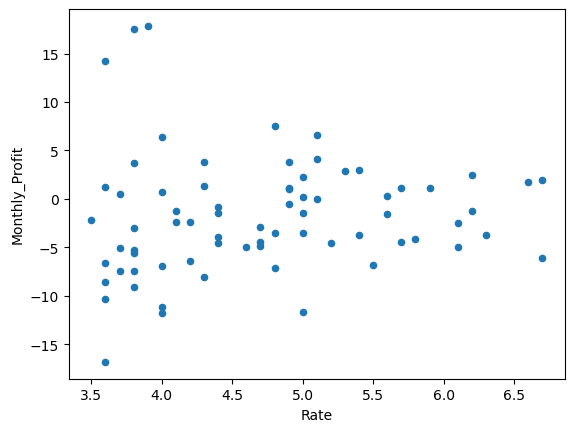

In [23]:
MonthlyProfit_Unemploy_df.plot(kind='scatter', x='Rate', y='Monthly_Profit')